In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FOLDER = 'Logs'
files = os.listdir(FOLDER)

#headings = list(filter(lambda x: 'headings' in x and not 'old' in x, files))
headings = list(filter(lambda x: 'headings' in x, files))
headings_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings]

#positions = list(filter(lambda x: 'position' in x and not 'old' in x, files))
positions = list(filter(lambda x: 'position' in x, files))
positions_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions]

In [3]:
headings

['RTI_Class_headings_JorgeP_26_M_2.csv',
 'RTI_Class_headings_Lena_33_F_0.csv',
 'RTI_Class_headings_Gina_36_F_0.csv',
 'RTI_Class_headings_Javier_24_M_old_2.csv',
 'RTI_Class_headings_DavidF_25_M_0.csv',
 'RTI_Class_headings_Sara_23_F_old_0.csv',
 'RTI_Class_headings_Alex_26_M_0.csv',
 'RTI_Class_headings_SmrtSapiens_23_M_0.csv',
 'RTI_Class_headings_Juana_33_F_1.csv',
 'RTI_Class_headings_Aldo_35_M_1.csv',
 'RTI_Class_headings_Joe_36_M_2.csv',
 'RTI_Class_headings_Aarushi_26_F_1.csv',
 'RTI_Class_headings_Marc_27_M_2.csv',
 'RTI_Class_headings_Jonas_30_M_0.csv',
 'RTI_Class_headings_Monica_27_F_1.csv',
 'RTI_Class_headings_Carlos_32_M_1.csv',
 'RTI_Class_headings_Carolina_28_F_old_2.csv',
 'RTI_Class_headings_Neil_22_M_1.csv',
 'RTI_Class_headings_NataliaM_25_F_old_0.csv',
 'RTI_Class_headings_JuanT_18_M_1.csv',
 'RTI_Class_headings_Cesc_25_M_old_0.csv',
 'RTI_Class_headings_Maja_26_F_old_2.csv',
 'RTI_Class_headings_Marta_33_F_1.csv',
 'RTI_Class_headings_Maud_31_F_1.csv',
 'RTI_Cla

In [4]:
positions

['RTI_Class_positions_JuanT_18_M_1.csv',
 'RTI_Class_positions_NataliaM_25_F_old_0.csv',
 'RTI_Class_positions_Carolina_28_F_old_2.csv',
 'RTI_Class_positions_Marta_33_F_1.csv',
 'RTI_Class_positions_Javier_24_M_old_2.csv',
 'RTI_Class_positions_Lena_33_F_0.csv',
 'RTI_Class_positions_Gina_36_F_0.csv',
 'RTI_Class_positions_Sara_23_F_old_0.csv',
 'RTI_Class_positions_Alex_26_M_0.csv',
 'RTI_Class_positions_SergioR_26_M_2.csv',
 'RTI_Class_positions_Aldo_35_M_1.csv',
 'RTI_Class_positions_DavidL_23_M_2.csv',
 'RTI_Class_positions_Marc_27_M_2.csv',
 'RTI_Class_positions_Juana_33_F_1.csv',
 'RTI_Class_positions_DavidF_25_M_0.csv',
 'RTI_Class_positions_Neil_22_M_1.csv',
 'RTI_Class_positions_Joe_36_M_2.csv',
 'RTI_Class_positions_Jonas_30_M_0.csv',
 'RTI_Class_positions_JorgeP_26_M_2.csv',
 'RTI_Class_positions_Maja_26_F_old_2.csv',
 'RTI_Class_positions_Cesc_25_M_old_0.csv',
 'RTI_Class_positions_Monica_27_F_1.csv',
 'RTI_Class_positions_Carlos_32_M_1.csv',
 'RTI_Class_positions_Maud_31_

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
1 --> 120.12201902110304
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
2 --> 9.172863818373518
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887


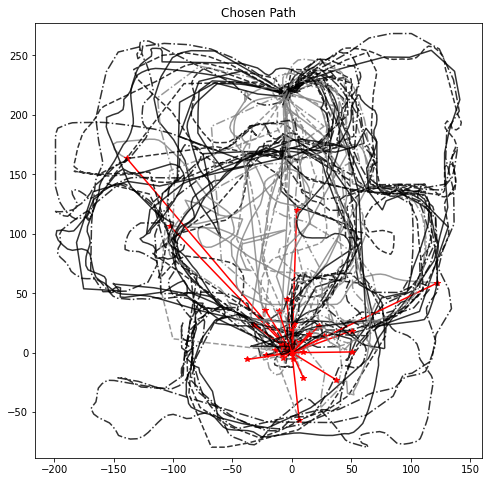

In [5]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'red',
              '1': 'red',
              '2': 'red'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='k', ls=ls_dict[exp_type], alpha=0.8, label='Finding')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='grey', ls=ls_dict[exp_type], alpha=0.8, label='Homing')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
plt.title('Chosen Path')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#plt.legend()

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
1 --> 120.12201902110304
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
2 --> 9.172863818373518
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887


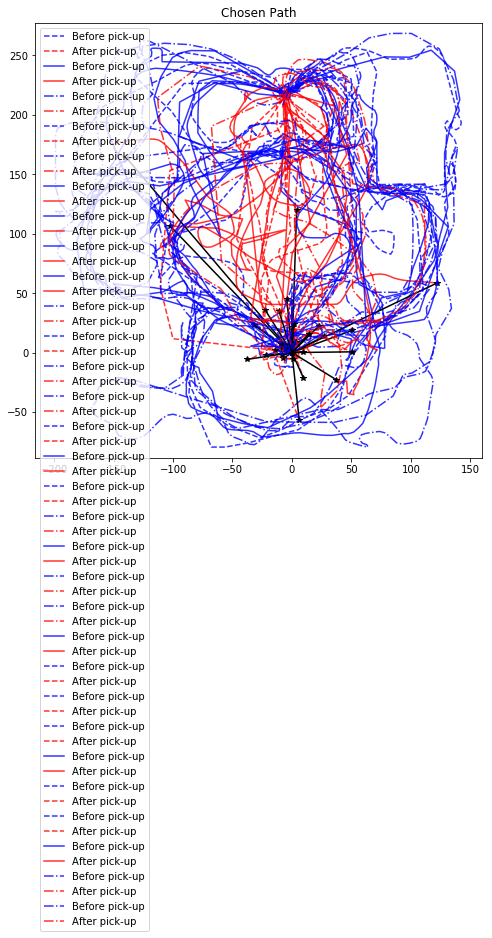

In [6]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'k',
              '1': 'k',
              '2': 'k'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='blue', ls=ls_dict[exp_type], alpha=0.8, label='Before pick-up')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='red', ls=ls_dict[exp_type], alpha=0.8, label='After pick-up')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
plt.title('Chosen Path')
plt.legend()

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
1 --> 120.12201902110304
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
2 --> 9.172863818373518
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Ad

0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887


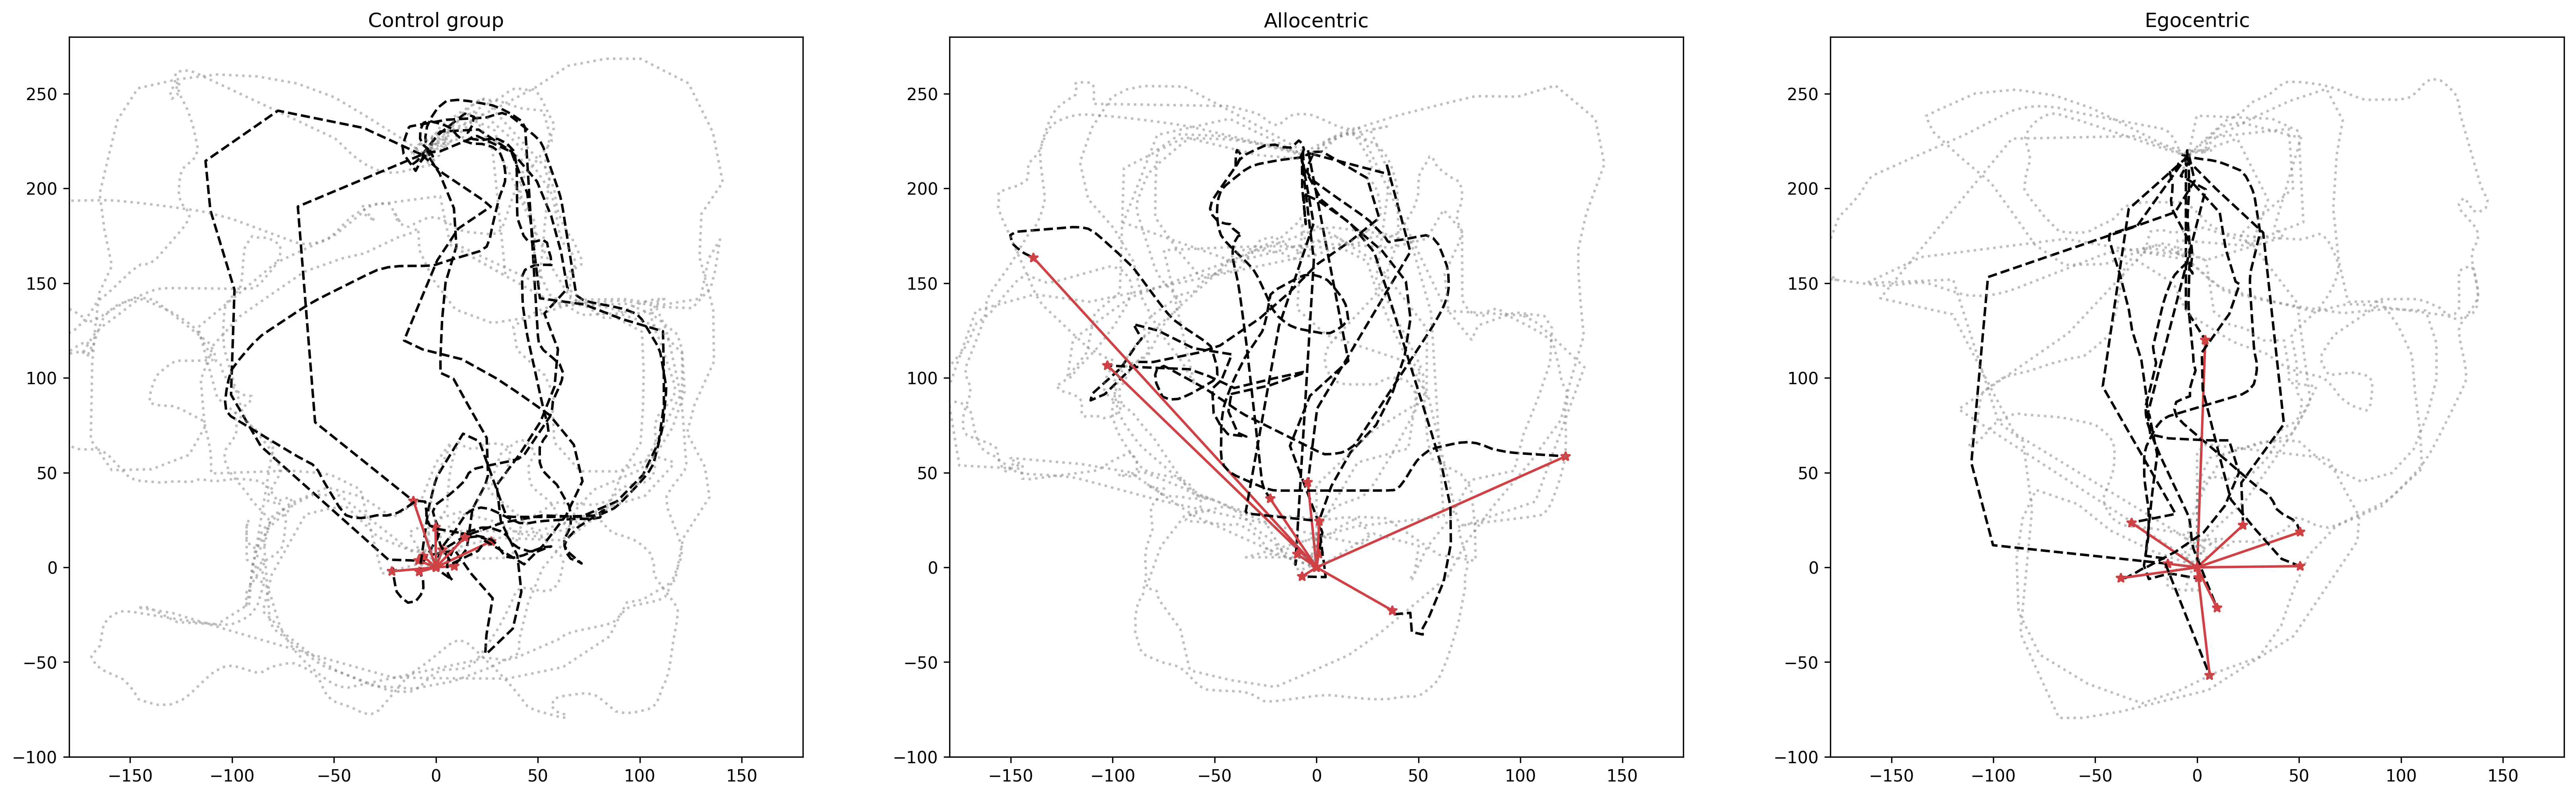

In [6]:
plt.figure(figsize=(27, 8), dpi=300)
plt.axis('equal')

color_dict = {'0': '#cf4144',
              '1': '#cf4144',
              '2': '#cf4144'}

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='grey', ls=':', alpha=0.5)
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='k', ls='--', alpha=1)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
#plt.title('Chosen Path')
#plt.legend()

In [8]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
1 --> 120.12201902110304
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
2 --> 9.172863818373518
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887
135.1483840586339
660.9053654474716
402.36153294334895


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Ad

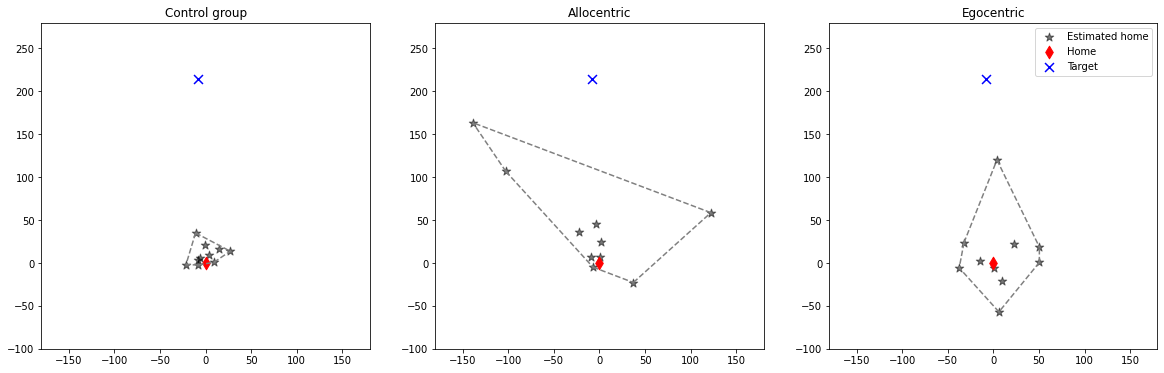

In [9]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from matplotlib.patches import Ellipse, Polygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

fig = plt.figure(figsize=(20, 6))
plt.axis('equal')

d_points = {'0': [],
            '1': [],
            '2': []}

pairs = {'0': [],
         '1': [],
         '2': []}

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    plt.scatter([x1], [z1], s=80, c='#00000088', marker='*', label='Estimated home')
    
    d_points[exp_type].append((x1, z1))
    
    pairs[exp_type].append((x1, z1))
    
    print(exp_type, '-->', error)    

ax = fig.add_subplot(131)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
points = np.array(d_points['2'])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='grey', ls='--')
print(hull.area)

x = np.array(pairs['0'])[:, 0]
y = np.array(pairs['0'])[:, 1]
confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none')


plt.subplot(132)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
points = np.array(d_points['0'])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='grey', ls='--')
print(hull.area)

ax3 = plt.subplot(133)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
points = np.array(d_points['1'])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='grey', ls='--')
print(hull.area)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.title('Chosen Path')
#plt.legend()

In [10]:
np.array(pairs['0']).std(axis=0)

array([67.29037868, 53.26891669])

In [11]:
points[simplex, 0]

array([50.45761 ,  6.148084])

In [12]:
hull.simplices

array([[1, 0],
       [8, 7],
       [4, 7],
       [4, 1],
       [9, 0],
       [9, 8]], dtype=int32)

In [13]:
results = pd.DataFrame(np.array([types, errs, times, times_return]).astype(np.float32).T,
                       columns=['group', 'err', 'time', 'return_times'])

In [15]:
results.groupby('group').count()

err  time  return_times
group                         
0.0     20    20            20
1.0     20    20            20
2.0     20    20            20

In [16]:
from scipy.stats import f_oneway, normaltest

In [17]:
results.groupby('group')['time'].mean()

group
0.0    100.097801
1.0     91.457466
2.0    106.139481
Name: time, dtype: float32

In [18]:
results.groupby('group')['return_times'].mean()

group
0.0    37.000549
1.0    35.041836
2.0    35.683434
Name: return_times, dtype: float32

In [19]:
results.groupby('group')['return_times'].std()

group
0.0    15.722640
1.0    14.652931
2.0     6.846709
Name: return_times, dtype: float64

In [20]:
results.groupby('group')['err'].mean()

group
0.0    68.123169
1.0    43.479816
2.0    17.596830
Name: err, dtype: float32

In [21]:
results.groupby('group')['err'].std()

group
0.0    69.918301
1.0    30.913799
2.0     9.943874
Name: err, dtype: float64

In [22]:
type_ = 'return_times'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
print(normaltest(e0))
print(normaltest(e1))
print(normaltest(e2))

print(f_oneway(e0, e1, e2))

NormaltestResult(statistic=20.66568811436379, pvalue=3.254639145079974e-05)
NormaltestResult(statistic=4.701058297634926, pvalue=0.09531871108539591)
NormaltestResult(statistic=5.001252210535559, pvalue=0.0820336208594775)
F_onewayResult(statistic=0.11759307279847933, pvalue=0.8892728796996705)


In [24]:
print('Return Times:')

for g, e in zip(['Control     ', 'Allocentric', 'Egocentric'], [e2, e0, e1]):
    print(f'{g}\t|Mean: {round(e.mean(), 2)} \t| Std: {round(e.std(), 2)}')

Return Times:
Control     	|Mean: 35.68000030517578 	| Std: 6.849999904632568
Allocentric	|Mean: 37.0 	| Std: 15.720000267028809
Egocentric	|Mean: 35.040000915527344 	| Std: 14.649999618530273


In [25]:
e1 = results[results['group']==1]

In [26]:
from scipy.stats import pearsonr

In [27]:
pearsonr(e1['time'], e1['err'])

(-0.4340605746754837, 0.055848526994260184)

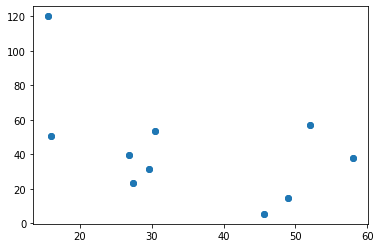

In [28]:
plt.scatter(e1['return_times'], e1['err'])

In [29]:
e1

group         err        time  return_times
0     1.0   53.817543   54.183830     30.381491
3     1.0  120.122017   70.203232     15.598810
10    1.0   14.630140  167.984604     49.000599
13    1.0    5.525801  140.591904     45.604340
15    1.0   39.930580   69.006233     26.816750
21    1.0   31.675276   70.615433     29.616430
22    1.0   23.460749   55.996891     27.404421
23    1.0   37.843102  107.994698     58.003250
25    1.0   57.331455  119.998001     52.006351
26    1.0   50.461506   57.999802     15.985930
30    1.0   53.817543   54.183830     30.381491
33    1.0  120.122017   70.203232     15.598810
40    1.0   14.630140  167.984604     49.000599
43    1.0    5.525801  140.591904     45.604340
45    1.0   39.930580   69.006233     26.816750
51    1.0   31.675276   70.615433     29.616430
52    1.0   23.460749   55.996891     27.404421
53    1.0   37.843102  107.994698     58.003250
55    1.0   57.331455  119.998001     52.006351
56    1.0   50.461506   57.999802     15.985930

In [66]:
results

group         err        time  return_times
0     1.0   53.817543   54.183830     30.381491
1     0.0  147.946487  121.001900     80.013031
2     2.0    9.089354  150.983795     36.996300
3     1.0  120.122017   70.203232     15.598810
4     2.0   21.611198   64.986214     32.787601
5     0.0    7.135922  140.793106     28.803200
6     0.0   45.038258   69.610878     34.005970
7     0.0    8.647261   78.993942     25.003611
8     0.0  214.428223   58.784901     39.188709
9     2.0    8.576839   55.000011     29.011570
10    1.0   14.630140  167.984604     49.000599
11    2.0   30.356682  108.600601     31.996189
12    2.0    9.172864   90.201950     35.804138
13    1.0    5.525801  140.591904     45.604340
14    0.0  135.518066  130.205597     41.017521
15    1.0   39.930580   69.006233     26.816750
16    2.0    8.370060  131.603104     48.415749
17    0.0   11.737762   75.008247     29.596310
18    2.0    9.743195   96.008041     30.000120
19    2.0   21.134937  100.991898     48.003979
20    0.0   43.609173   84.992508     32.988461
21    1.0   31.675276   70.615433     29.616430
22    1.0   23.460749   55.996891     27.404421
23    1.0   37.843102  107.994698     58.003250
24    0.0   42.714279  105.591499     23.383869
25    1.0   57.331455  119.998001     52.006351
26    1.0   50.461506   57.999802     15.985930
27    0.0   24.456274  135.995407     36.004799
28    2.0   36.648048  143.002899     33.006302
29    2.0   21.265123  120.016296     30.812380

In [67]:
e0

1     80.013031
5     28.803200
6     34.005970
7     25.003611
8     39.188709
14    41.017521
17    29.596310
20    32.988461
24    23.383869
27    36.004799
Name: return_times, dtype: float32

{'whiskers': [<matplotlib.lines.Line2D at 0x129bb9898>,
 'caps': [<matplotlib.lines.Line2D at 0x129bb9f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x129bb94a8>,
 'medians': [<matplotlib.lines.Line2D at 0x129bbe5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x129bbe940>,
 'means': []}

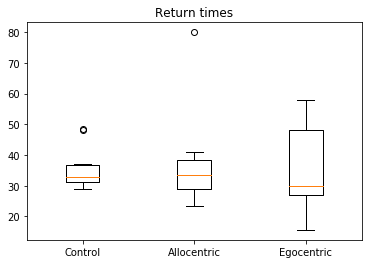

In [70]:
plt.title('Return times')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [82]:
from scipy.stats import kruskal

In [83]:
type_ = 'err'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
print(normaltest(e0))
print(normaltest(e1))
print(normaltest(e2))

print(f_oneway(e0, e1, e2))
print(kruskal(e0, e1, e2))

NormaltestResult(statistic=3.208746123639642, pvalue=0.20101553973042485)
NormaltestResult(statistic=9.551328942208631, pvalue=0.008432479086786354)
NormaltestResult(statistic=1.4248464992263083, pvalue=0.4904542631858325)
F_onewayResult(statistic=3.0527345483170896, pvalue=0.06379170994900961)
KruskalResult(statistic=6.289032258064509, pvalue=0.043087767923513993)


In [84]:
print('Error:')

for g, e in zip(['Control     ', 'Allocentric', 'Egocentric'], [e2, e0, e1]):
    print(f'{g}\t|Mean: {round(e.mean(), 2)} \t| Std: {round(e.mean(), 2)}')

Error:
Control     	|Mean: 17.6 	| Std: 17.6
Allocentric	|Mean: 68.12 	| Std: 68.12
Egocentric	|Mean: 43.48 	| Std: 43.48


{'whiskers': [<matplotlib.lines.Line2D at 0x129e1d390>,
 'caps': [<matplotlib.lines.Line2D at 0x129e1da20>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e16f60>,
 'medians': [<matplotlib.lines.Line2D at 0x129e1de48>,
 'fliers': [<matplotlib.lines.Line2D at 0x129e26438>,
 'means': []}

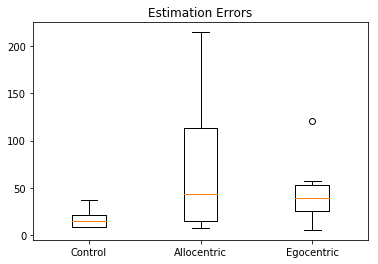

In [85]:
plt.title('Estimation Errors')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [86]:
e0

1     147.946487
5       7.135922
6      45.038258
7       8.647261
8     214.428223
14    135.518066
17     11.737762
20     43.609173
24     42.714279
27     24.456274
Name: err, dtype: float32

In [87]:
print(e2.mean())
print(e0.mean())
print(e1.mean())

17.596830368041992
68.12318420410156
43.479820251464844


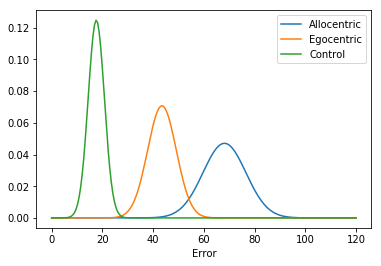

In [88]:
import math
from scipy import stats
for e, n in zip([e0, e1, e2], ['Allocentric', 'Egocentric', 'Control']):
    mu = e.mean()
    variance = e.std()
    sigma = math.sqrt(variance)
    x = np.linspace(0, 120, 200)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=n)
plt.xlabel('Error')
plt.legend()

In [89]:
e0

1     147.946487
5       7.135922
6      45.038258
7       8.647261
8     214.428223
14    135.518066
17     11.737762
20     43.609173
24     42.714279
27     24.456274
Name: err, dtype: float32

In [90]:
e1

0      53.817543
3     120.122017
10     14.630140
13      5.525801
15     39.930580
21     31.675276
22     23.460749
23     37.843102
25     57.331455
26     50.461506
Name: err, dtype: float32

In [91]:
e2

2      9.089354
4     21.611198
9      8.576839
11    30.356682
12     9.172864
16     8.370060
18     9.743195
19    21.134937
28    36.648048
29    21.265123
Name: err, dtype: float32

In [92]:
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu

In [93]:
mannwhitneyu(e0.iloc[1:], e1.iloc[1:])

MannwhitneyuResult(statistic=39.0, pvalue=0.46481826225353534)

In [94]:
mannwhitneyu

<function scipy.stats.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)>

In [95]:
results.groupby('group').count()

err  time  return_times
group                         
0.0     10    10            10
1.0     10    10            10
2.0     10    10            10

In [96]:
h = headings_csv[8]

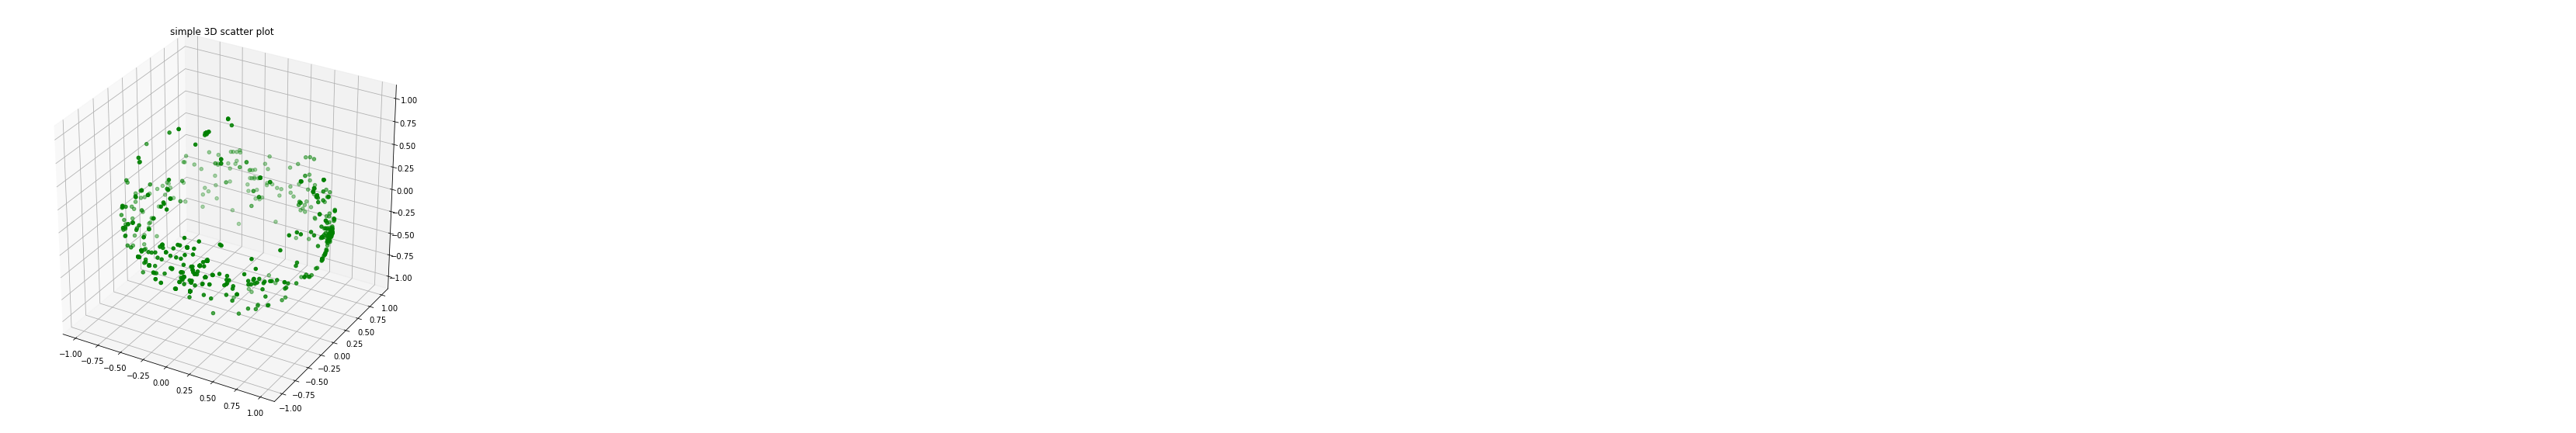

In [97]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(h.z, h.x, h.y, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

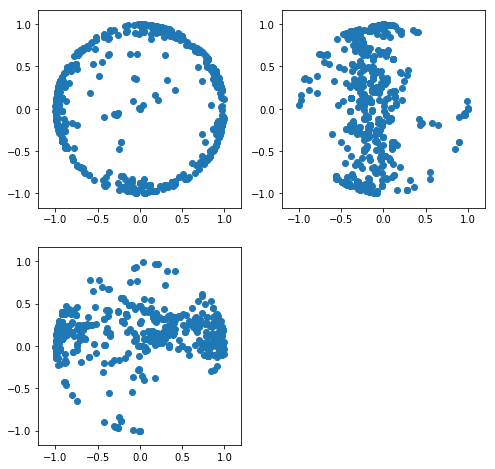

In [98]:
lim = 1.2
plt.figure(figsize=(8, 8))
plt.subplot(222)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.y, h.z)
plt.subplot(221)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, h.z)
plt.subplot(223)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, -h.y)

In [99]:
def cart_to_spherical(x, y, z):
    theta = np.arctan(np.sqrt(x**2 + y**2)/z)
    phi = np.arctan2(y, x)
    return theta, phi

In [100]:
theta, phi = cart_to_spherical(h.x, h.z, h.y)

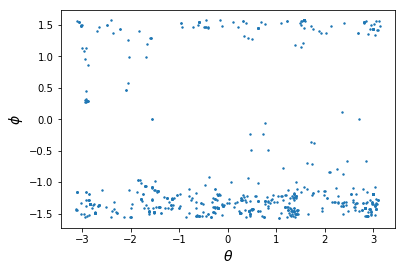

In [101]:
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.scatter(phi, theta, s=2)

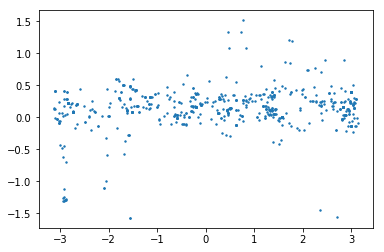

In [102]:
plt.scatter(phi, (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2, s=2)

In [103]:
theta2 = (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2
theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
phi = phi.append(pd.Series([-np.pi, np.pi]))

In [104]:
def myplot(x, y, s, bins=300):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0]-margin, xedges[-1]+margin, yedges[0]-margin, yedges[-1]+margin]
    return heatmap.T, extent

Text(0.5, 1.0, 'Heading distribution')

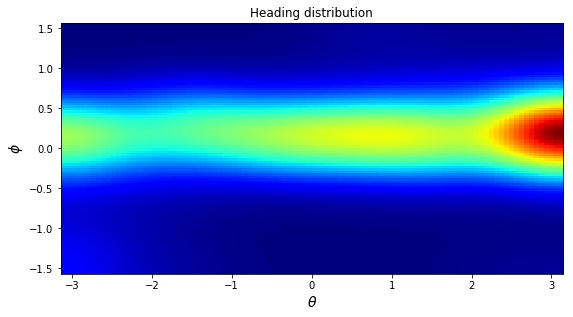

In [105]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title('Heading distribution')

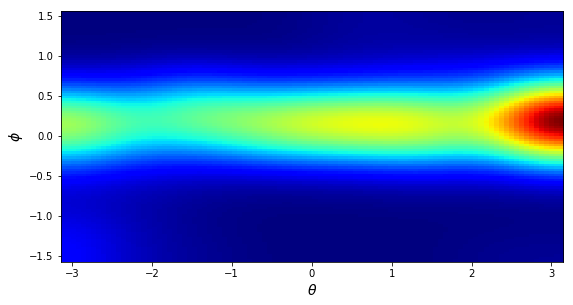

In [106]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

In [107]:
def spherical2cart(p, t):
    x = np.cos(t)*np.sin(p)
    y = np.sin(t)*np.sin(p)
    z = np.cos(p)
    return x, y, z

In [108]:
len(np.linspace(extent[0], extent[1], 500))

500

In [109]:
stats.entropy(img.ravel())

8.58072147656926

In [110]:
def calculate_entropy(x, y, z, bins=300, s=40):
    t, p = cart_to_spherical(x, y, z)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return stats.entropy(heatmap.ravel())

2 ---> 11.053743486861343


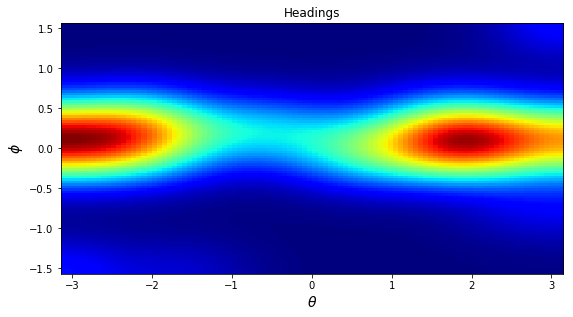

0 ---> 10.764596584823588


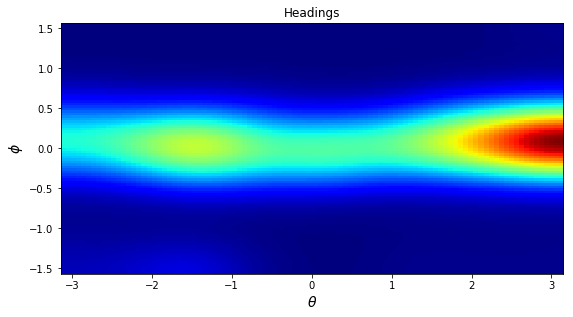

0 ---> 11.104238126006019


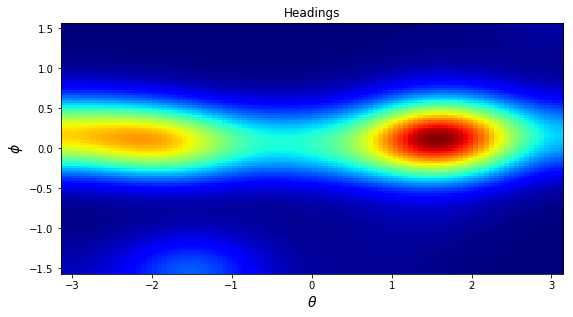

2 ---> 10.696872066579106


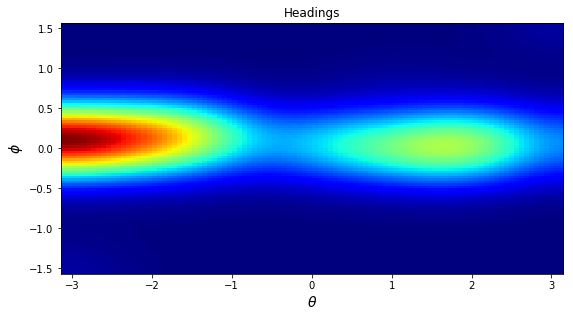

0 ---> 11.229111246021585


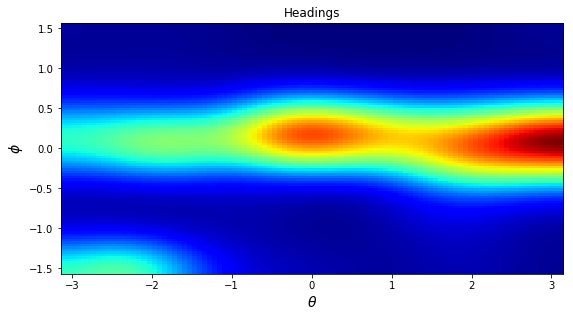

0 ---> 10.837958054080993


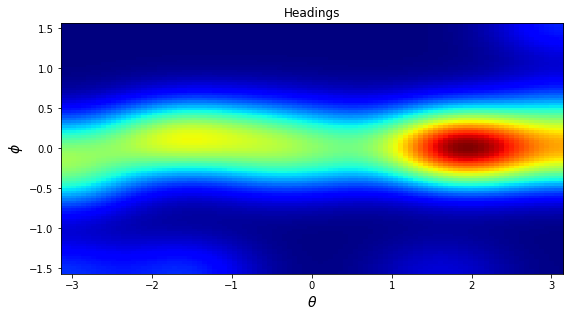

0 ---> 11.205994900282475


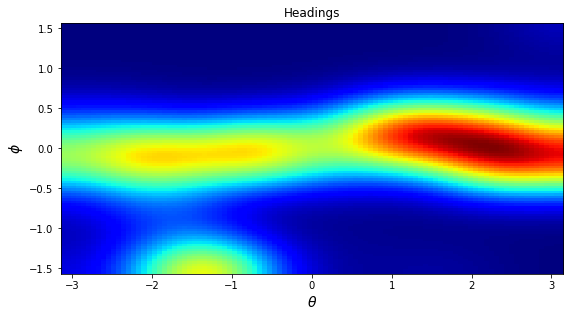

0 ---> 10.956249564234742


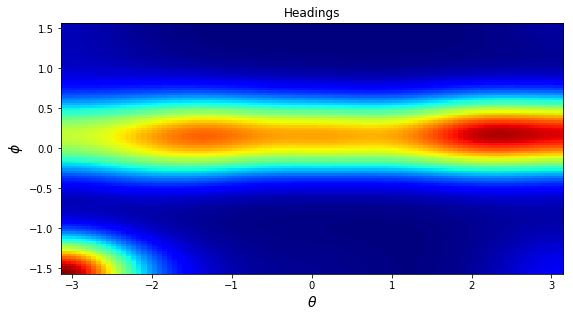

1 ---> 11.15960963022643


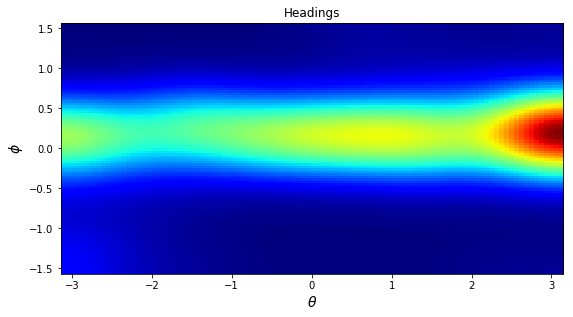

1 ---> 10.87640613574953


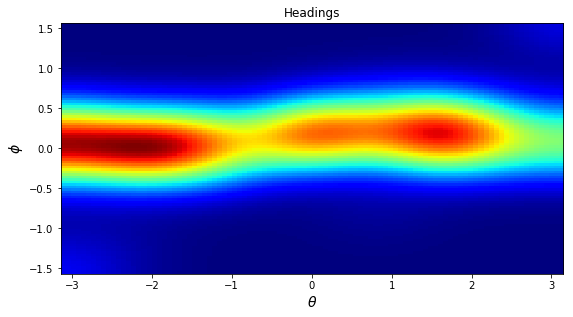

2 ---> 11.072889863908344


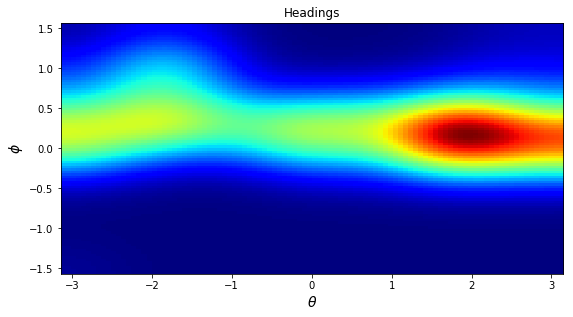

1 ---> 11.008436015430949


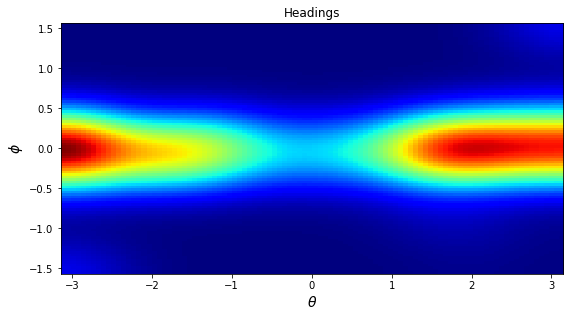

2 ---> 11.029638421286323


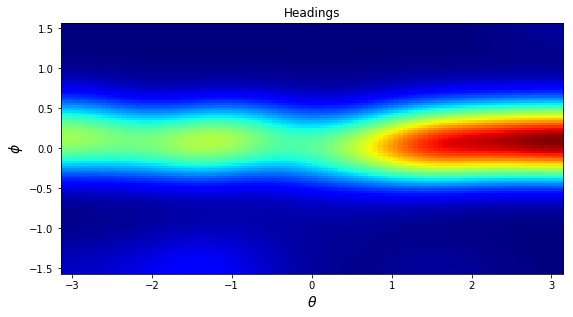

0 ---> 10.821132334285128


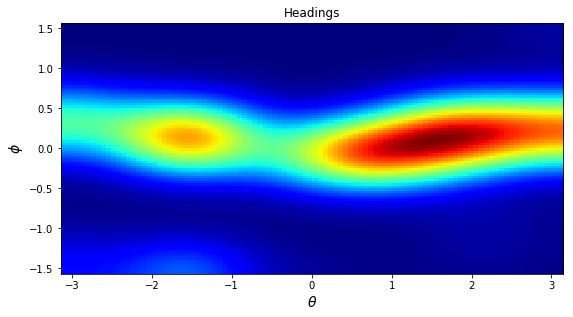

1 ---> 10.871241833654537


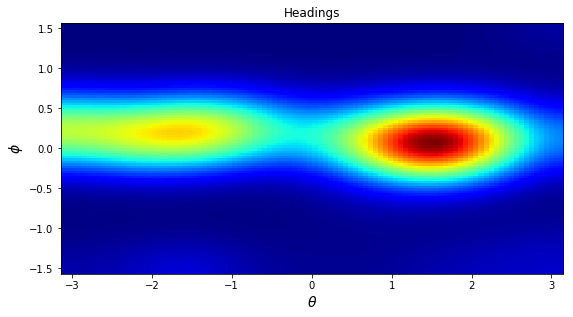

1 ---> 10.614060770354154


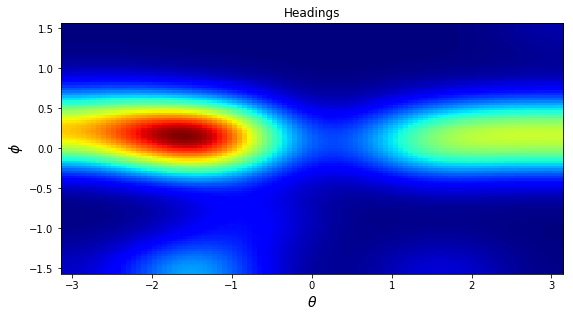

2 ---> 10.996098927793666


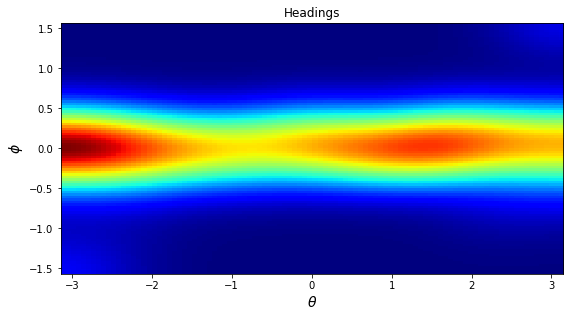

1 ---> 10.97233471433535


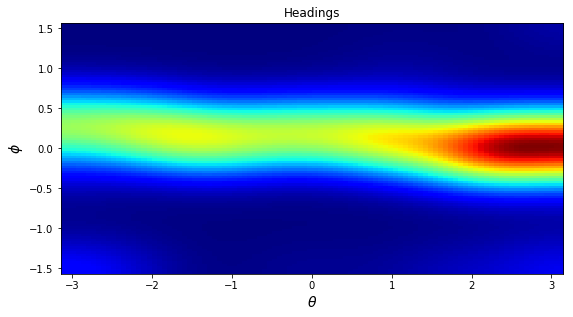

0 ---> 11.068594980745859


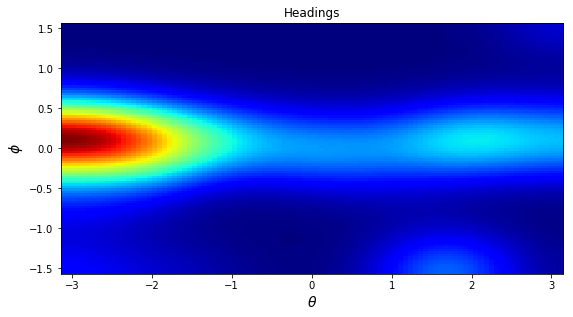

1 ---> 10.779880419589382


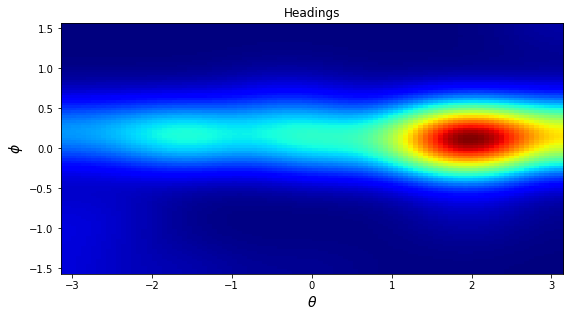

0 ---> 11.093781055381527


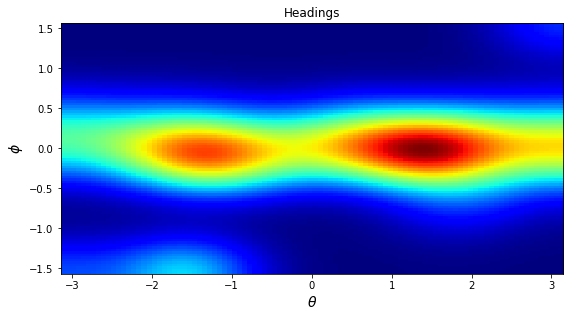

2 ---> 11.031929571322811


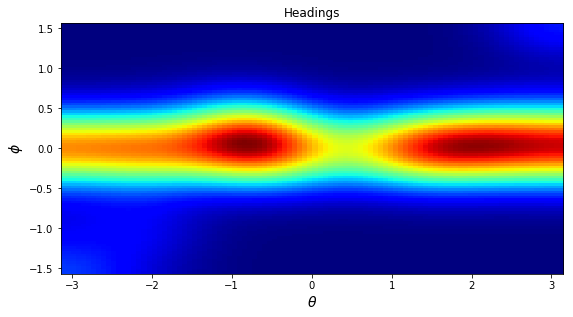

1 ---> 10.477555197149501


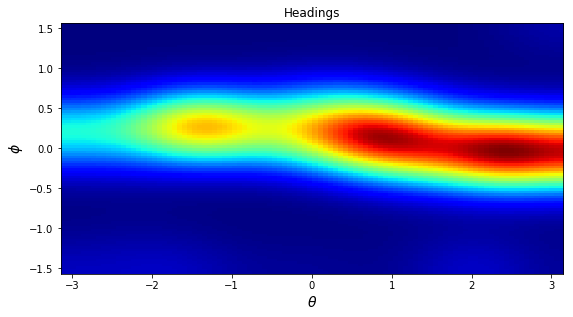

1 ---> 11.06832624318387


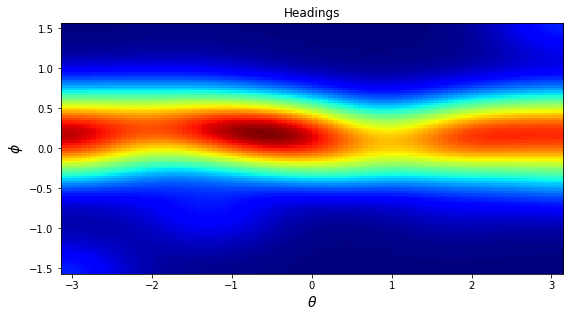

2 ---> 11.0980519009393


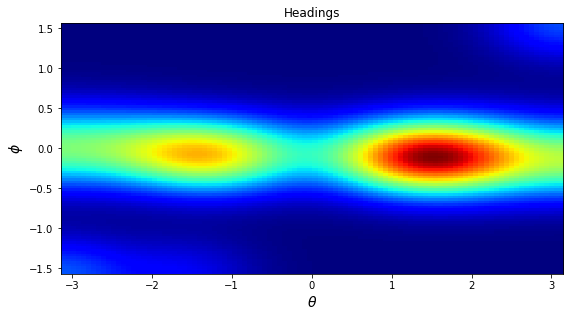

1 ---> 10.836721536738233


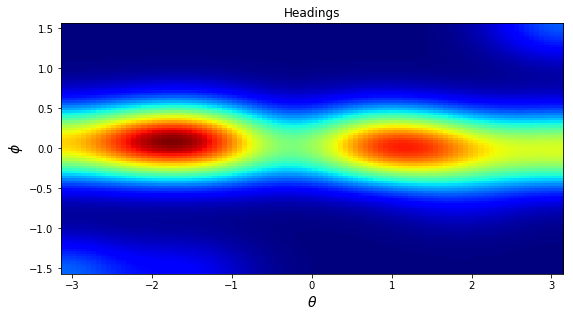

2 ---> 10.76301185151751


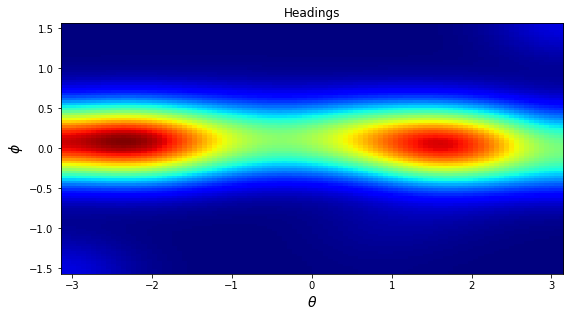

2 ---> 11.051495554800665


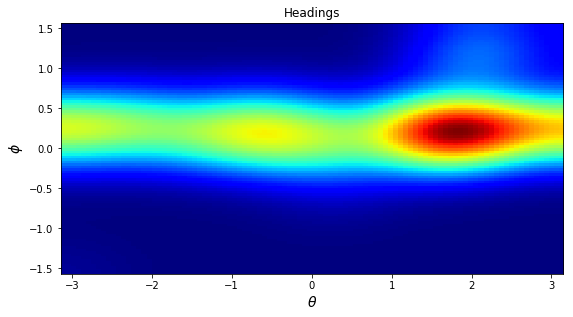

2 ---> 11.04371554239476


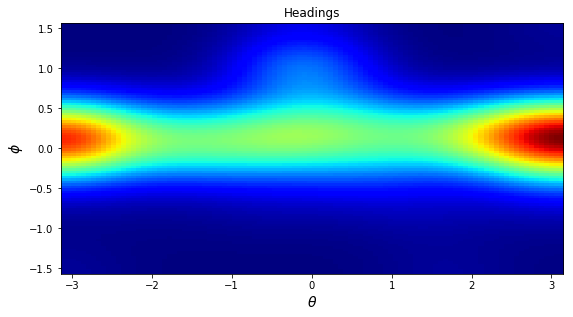

0 ---> 10.872046515141628


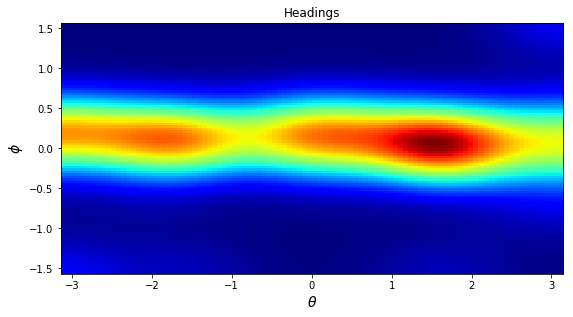

In [111]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(H)

In [112]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [113]:
entropies.groupby('group')['H'].mean()

group
0.0    10.995370
1.0    10.866457
2.0    10.983745
Name: H, dtype: float64

In [114]:
entropies.groupby('group')['H'].std()

group
0.0    0.167009
1.0    0.205888
2.0    0.137315
Name: H, dtype: float64

In [119]:
g1 = entropies[entropies['group']==0]['H'].values
g2 = entropies[entropies['group']==1]['H'].values
g3 = entropies[entropies['group']==2]['H'].values

In [122]:
print('Entropies:')

for g, e in zip(['Control     ', 'Allocentric', 'Egocentric'], [g3, g1, g2]):
    print(f'{g}\t|Mean: {round(e.mean(), 2)} \t| Std: {round(e.mean(), 2)}')

Entropies:
Control     	|Mean: 10.98 	| Std: 10.98
Allocentric	|Mean: 11.0 	| Std: 11.0
Egocentric	|Mean: 10.87 	| Std: 10.87


{'whiskers': [<matplotlib.lines.Line2D at 0x107e64c18>,
 'caps': [<matplotlib.lines.Line2D at 0x107e64f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x107e64828>,
 'medians': [<matplotlib.lines.Line2D at 0x107e69978>,
 'fliers': [<matplotlib.lines.Line2D at 0x107e69cc0>,
 'means': []}

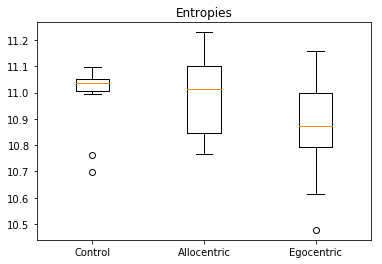

In [121]:
plt.title('Entropies')
plt.boxplot([g3, g1, g2], labels=['Control', 'Allocentric', 'Egocentric'])

In [116]:
from scipy.stats import f_oneway

In [124]:
print(normaltest(g1))
print(normaltest(g2))
print(normaltest(g3))
print(f_oneway(g1, g2, g3))

NormaltestResult(statistic=2.2846209573204987, pvalue=0.3190809397809942)
NormaltestResult(statistic=0.8998655707639305, pvalue=0.6376710109948048)
NormaltestResult(statistic=6.883232590837494, pvalue=0.03201290118437219)
F_onewayResult(statistic=1.7114083822565276, pvalue=0.19962669796412882)


In [202]:
entropies.groupby('group')['H'].count()

group
0.0    10
1.0     9
2.0     9
Name: H, dtype: int64

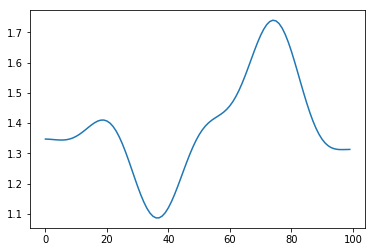

In [203]:
plt.plot(img.sum(axis=0))

2 ---> 11.053743486861343


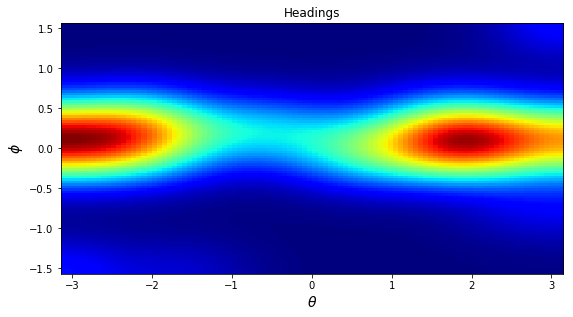

0 ---> 10.764596584823588


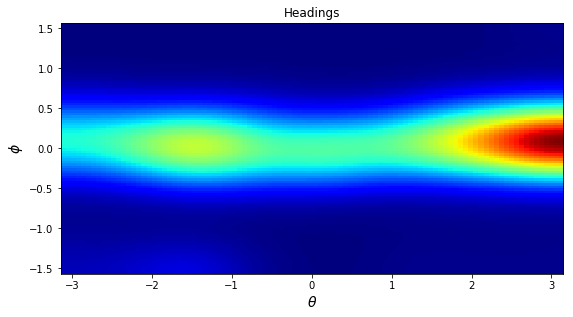

0 ---> 11.104238126006019


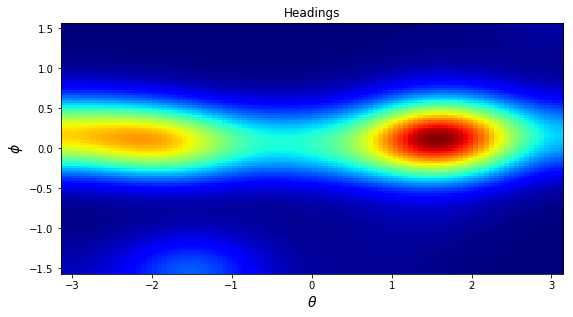

2 ---> 10.696872066579106


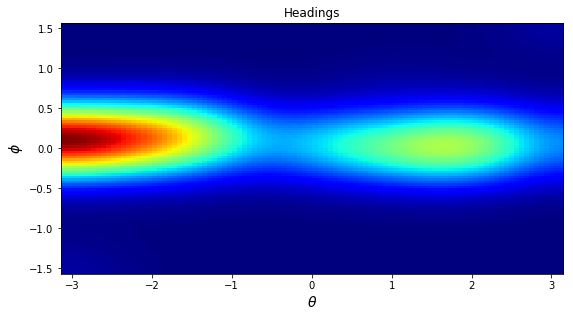

0 ---> 11.229111246021585


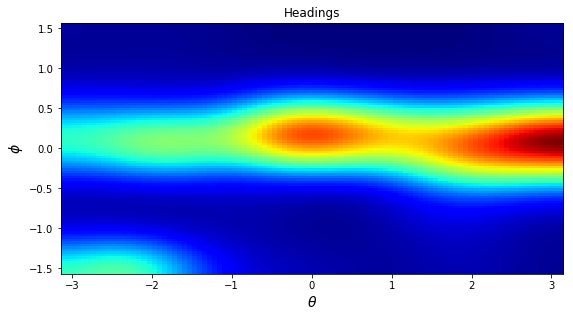

0 ---> 10.837958054080993


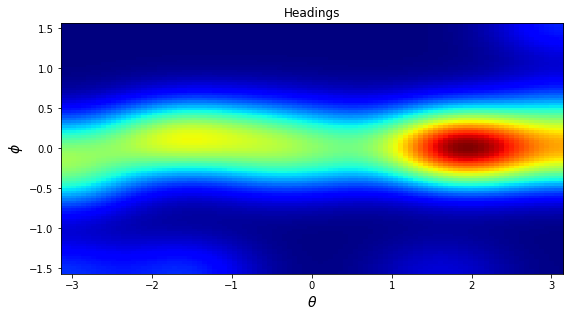

0 ---> 11.205994900282475


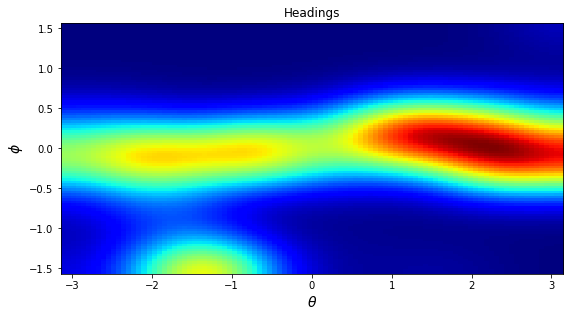

0 ---> 10.956249564234742


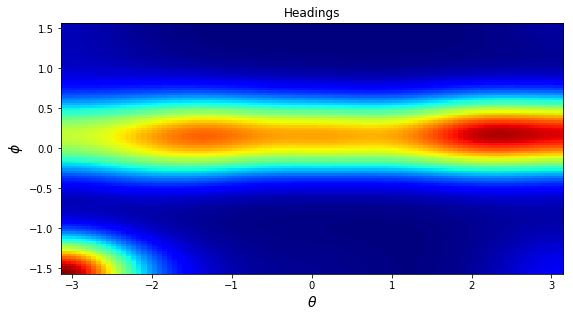

1 ---> 11.15960963022643


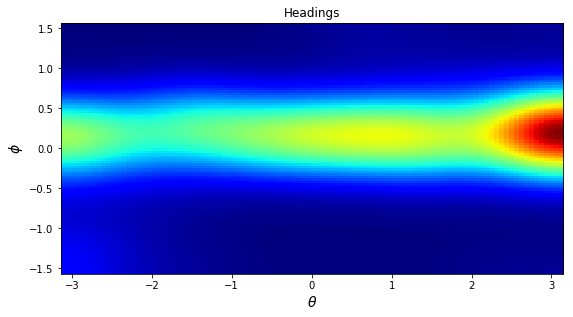

1 ---> 10.87640613574953


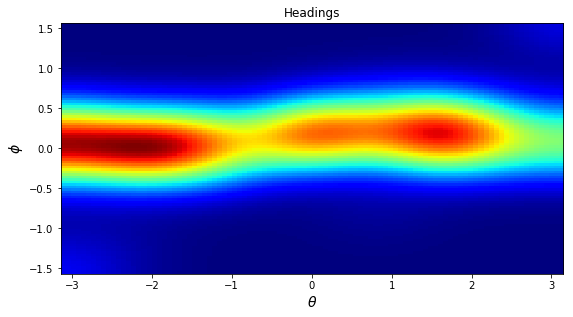

2 ---> 11.072889863908344


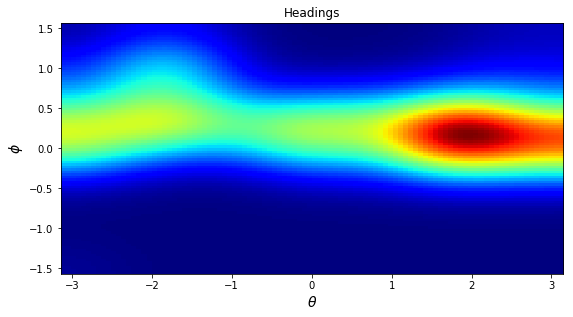

1 ---> 11.008436015430949


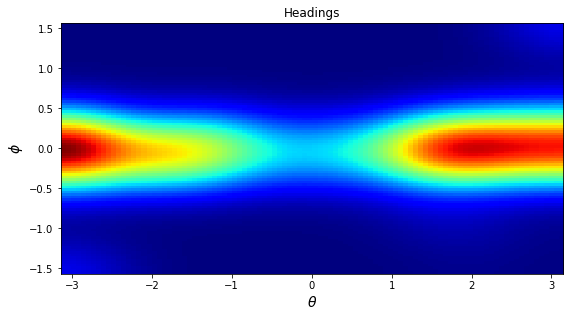

0 ---> 10.821132334285128


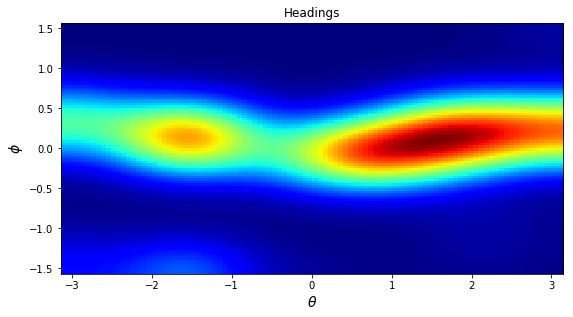

1 ---> 10.871241833654537


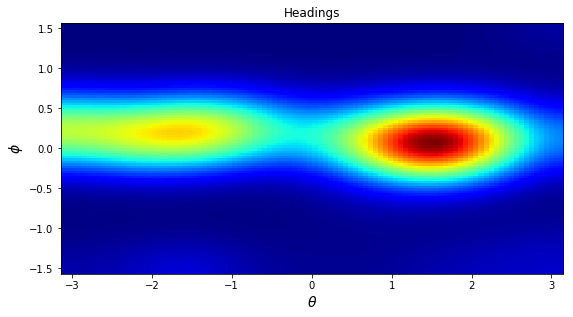

1 ---> 10.614060770354154


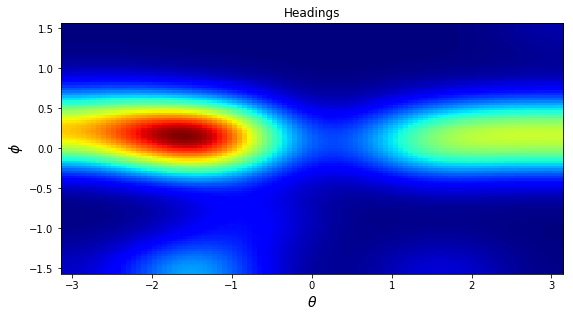

2 ---> 10.996098927793666


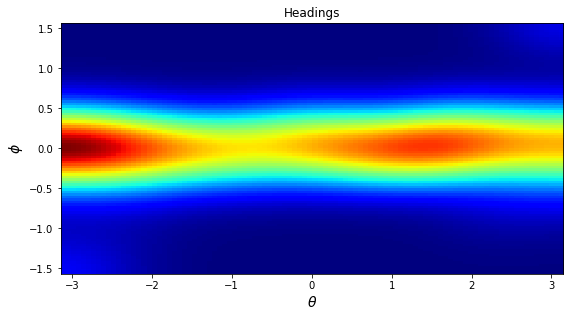

1 ---> 10.97233471433535


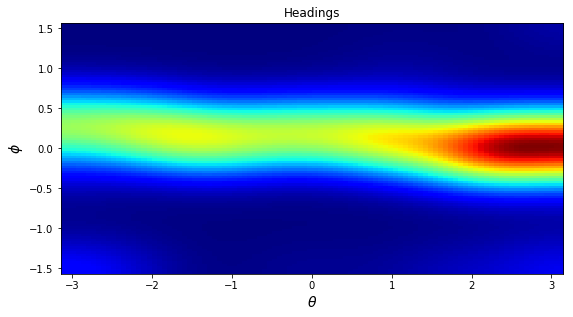

0 ---> 11.068594980745859


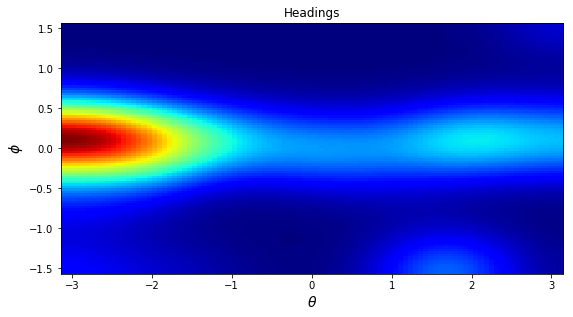

1 ---> 10.779880419589382


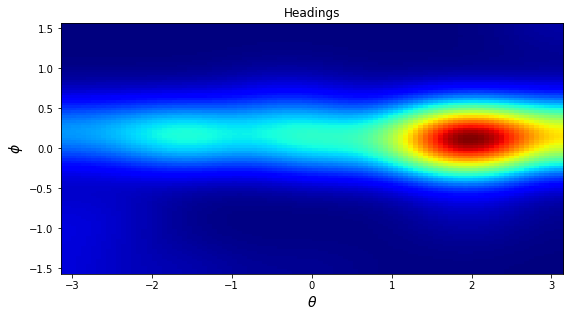

0 ---> 11.093781055381527


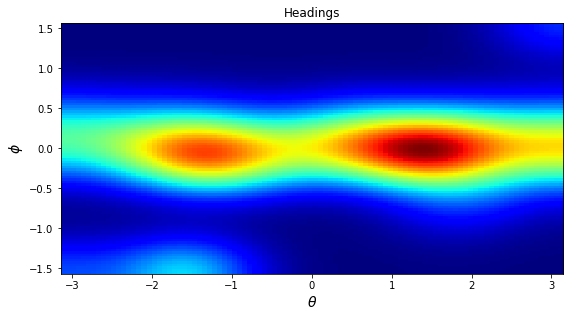

2 ---> 11.031929571322811


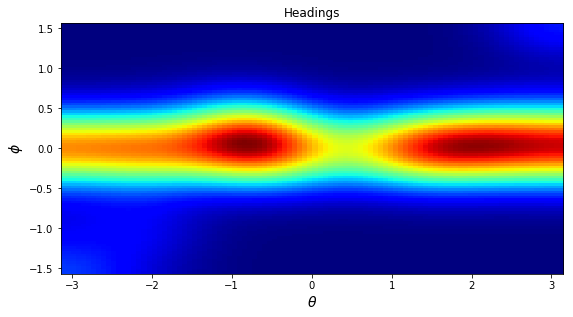

1 ---> 11.06832624318387


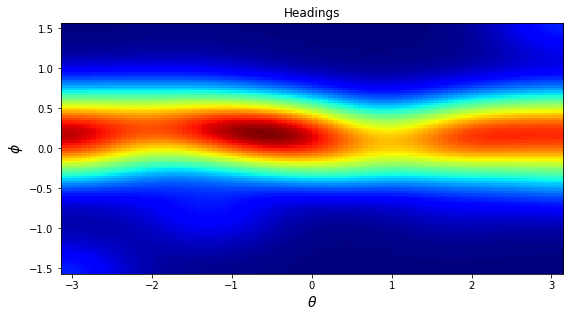

2 ---> 11.0980519009393


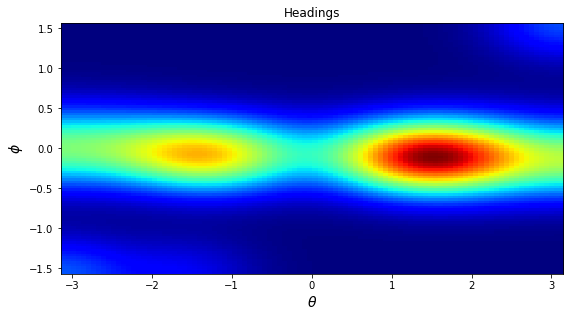

1 ---> 10.836721536738233


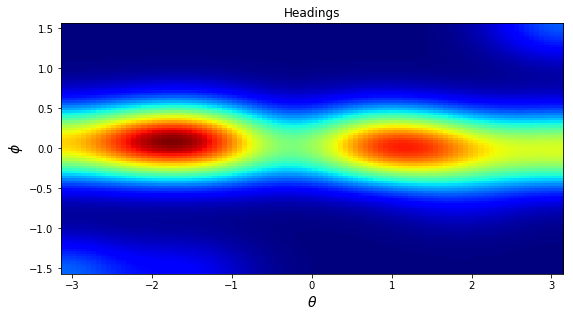

2 ---> 10.76301185151751


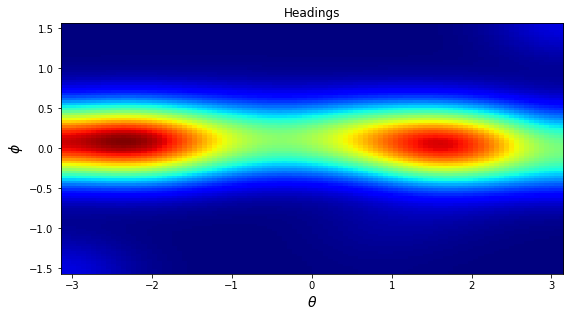

2 ---> 11.051495554800665


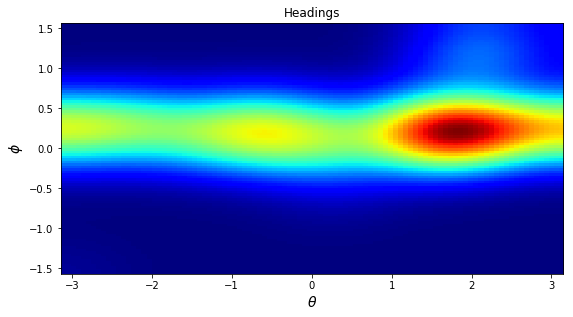

2 ---> 11.04371554239476


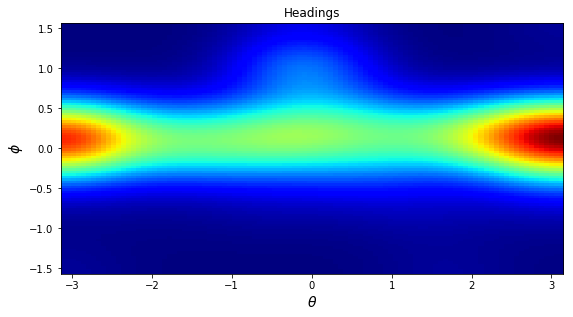

0 ---> 10.872046515141628


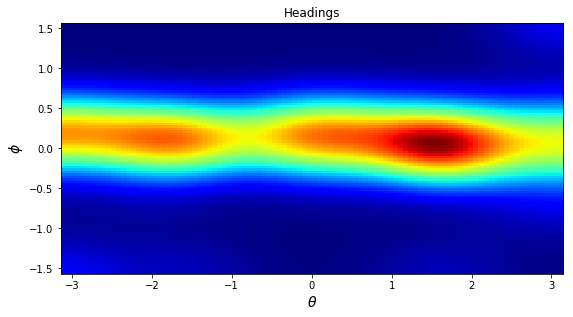

In [204]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(stats.entropy(img.sum(axis=0)))

In [205]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [206]:
entropies.groupby('group')['H'].mean()

group
0.0    4.573740
1.0    4.565837
2.0    4.573910
Name: H, dtype: float64

In [207]:
entropies.groupby('group')['H'].std()

group
0.0    0.032585
1.0    0.029982
2.0    0.021802
Name: H, dtype: float64